# Práctica 6 ACP con datos obtenidos por el estudiante



In [3]:
import pandas as pd
df=pd.DataFrame()
df["NOMBRE"]=['Hugo','Daniel','Blanca']
df["EDAD"]=[24,12,30]
df["DOMICILIO"]=['CDMX','EDOMEX','CDMX']
df
eliminar=[]
eliminar.append('DOMICILIO')
df2=df.drop(columns=eliminar)
df2

,NOMBRE,EDAD
0,Hugo,24
1,Daniel,12
2,Blanca,30


+ **Nombre:** Meza Vega Hugo Adrian
+ **No. cuenta:** 314344580
+ **correo:** hamv1509@gmail.com

# Objetivo

Identificar una fuente de datos abiertos para su importación en Google Colab o Jupyter a través de alguna plataforma Git (Github, Gitlab o algún otro).

Mostrar el procedimiento y la ejecución de la importación de datos (archivos CSV) desde un repositorio Git dentro de un cuaderno en Colab o Jupyter. Además, realizar el proceso de EDA con los datos identificados.

# Datos

Conjunto de datos de emisiones CO2 de vehículos automotores.

Este conjunto de datos muestra los detalles de cómo las emisiones de CO2 de un automóvil pueen variar con difernetes características de motor y transmisión. Estos datos provienen del sitio web oficial de datos abiertos del gobierno de Canadá.

* Es una versión reducida y contiene datos durante un periodo de 7 años.
* Hay un total de 7835 filas y 12 columnas.
* Contiene abreviaturas utilizadas para describir características

# Modelo

* X = Gasolina normal
* Z = Gasolina premium
* D = Diésel
* E = Etanol (E85)
* N = Gas natural

# Consumo de combustible

Las clasificaciones de consumo de combustible de la ciudad y las carreteras se muestran en litros por 100 kilómetros (L/100 km) - la clasificación combinada (55 % ciudad, 45 % autopista) se muestra en L/100 km y en millas por galón (mpg)


* Determinar o probar la influencia de diferentes variables en la emisión de CO2.
* ¿Cuáles son las características más influyentes que más afectan a las emisiones de CO2?
* ¿Habrá alguna diferencia en las emisiones de CO2 cuando el consumo de combustible para la ciudad y la carretera se considere por separado y cuando se considere su interacción variable ponderada?


Datos recuperados de Kaggle: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [1]:
import pandas as pd                    # Para la manipulación y análisis de datos
import numpy as np                     # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt        # Para la generación de gráficas a partir de los datos
import seaborn as sns                  # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
url="https://github.com/hamv15/Mineria-de-Datos/blob/main/DATASETS/CO2EmissionsCanada.csv?raw=true"
datosAutos=pd.read_csv(url)

In [3]:
datosAutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
datosAutos = datosAutos.drop(columns=['Fuel Consumption Comb (mpg)']) #Eliminación de variable porque es la misma información pero en otra unidad de medida

In [5]:
datosAutos.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [6]:
datosAutos.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

Como se puede observar, no hay presencia de datos nulos.

## **I. Análisis de componentes principales (ACP)**

1. Hay evidencia de variables posiblemente correlacionadas.
2. Se hace una estandarización de los datos.
3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones.
4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior.
5. Se decide el número de componentes principales. 
- Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total. 
- Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
6. Se examina la proporción de relevancias –cargas–

In [7]:
CorrAutos = datosAutos.corr(method='pearson')
CorrAutos

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,0.918052
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,1.000000


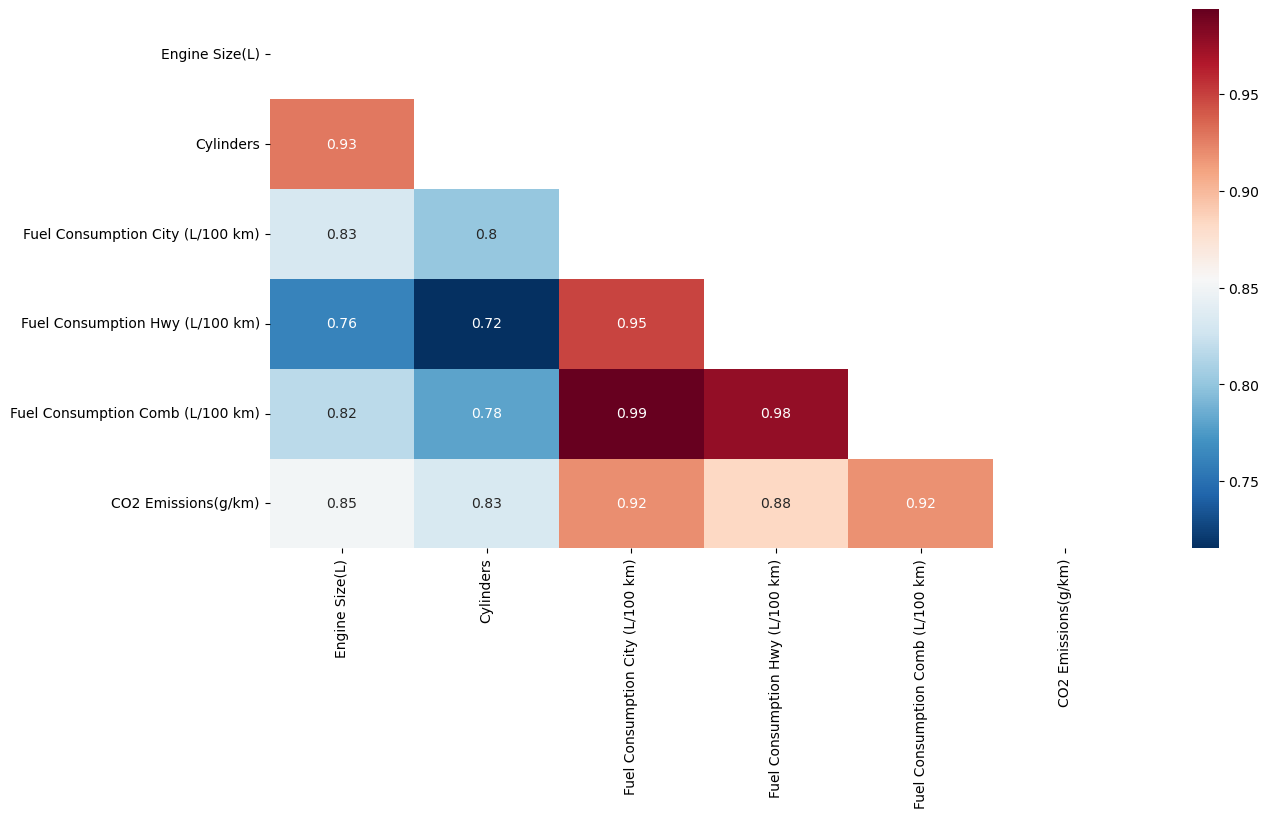

In [8]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrAutos)
sns.heatmap(CorrAutos, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

#### **Paso 2:** Se hace una estandarización de los datos.

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
Estandarizar = StandardScaler()                                  # Se instancia el objeto StandardScaler o MinMaxScaler 
NuevaMatriz = datosAutos.drop(columns=['Make','Model', 'Vehicle Class', 'Transmission', 'Fuel Type'])    # Se quitan las variables nominales
MEstandarizada = Estandarizar.fit_transform(NuevaMatriz)         # Se calculan la media y desviación para cada variable, y se escalan los datos

In [10]:
pd.DataFrame(MEstandarizada, columns=NuevaMatriz.columns)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,-0.856721,-0.883408,-0.759002,-1.052781,-0.855742,-0.932933
1,-0.561317,-0.883408,-0.387577,-0.603202,-0.475423,-0.505646
2,-1.225976,-0.883408,-1.873275,-1.457401,-1.754677,-1.958421
3,0.251043,0.210575,0.040990,0.026208,0.043193,0.075464
4,0.251043,0.210575,-0.130437,-0.153624,-0.129679,-0.112542
...,...,...,...,...,...,...
7380,-0.856721,-0.883408,-0.530433,-0.603202,-0.544572,-0.539829
7381,-0.856721,-0.883408,-0.387577,-0.333455,-0.371700,-0.317640
7382,-0.856721,-0.883408,-0.244721,-0.198582,-0.233402,-0.180908
7383,-0.856721,-0.883408,-0.387577,-0.333455,-0.371700,-0.317640


In [39]:
MEstandarizada

array([[-0.85672099, -0.88340757, -0.75900153, -1.05278069, -0.85574185,
        -0.93293275],
       [-0.5613172 , -0.88340757, -0.3875769 , -0.60320221, -0.47542306,
        -0.50564599],
       [-1.22597573, -0.88340757, -1.87327544, -1.45740132, -1.75467716,
        -1.95842095],
       ...,
       [-0.85672099, -0.88340757, -0.24472127, -0.19858158, -0.23340202,
        -0.18090806],
       [-0.85672099, -0.88340757, -0.3875769 , -0.33345513, -0.37169976,
        -0.31763982],
       [-0.85672099, -0.88340757, -0.10186564, -0.15362374, -0.09510428,
        -0.0441763 ]])

#### **Pasos 3 y 4:** Se calcula la matriz de covarianzas o correlaciones, y se calculan los componentes (eigen-vectores) y la varianza (eigen-valores)

In [38]:
pca = PCA(n_components=None)     # pca=PCA(n_components=None), pca=PCA(.85)
pca.fit(MEstandarizada)          # Se obtiene los componentes
df=pd.DataFrame(pca.components_, columns=NuevaMatriz.columns.to_list())
df


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0.396902,0.386463,0.422059,0.406380,0.421629,0.414808
1,-0.506388,-0.611676,0.250450,0.449226,0.322301,0.031879
2,0.270322,0.066655,0.148777,0.244760,0.183309,-0.898242
3,-0.715284,0.663573,0.146997,-0.035827,0.084510,-0.134189
4,-0.036541,0.178119,-0.657208,0.703758,-0.194082,0.045525
5,-0.000415,0.000591,-0.532425,-0.276739,0.799962,-0.000423


In [ ]:
for i in range(len(b)):
    b[i]=list(b[i])
print(str(b))

#### **Paso 5:** Se decide el número de componentes principales

* Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total.
* Se identifica mediante una gráfica el grupo de componentes con mayor varianza.

In [12]:
Varianza = pca.explained_variance_ratio_
print('Porporción de varianza:', Varianza)


Porporción de varianza: [8.87424815e-01 7.66942267e-02 1.69410094e-02 1.16401440e-02
 7.27675024e-03 2.30544850e-05]


In [40]:
len(Varianza)

6

In [13]:
print('Varianza acumulada:', sum(Varianza[0:1]))   
#Con 1 componente se tiene el 88% de varianza acumulada y con 4 el 96%

Varianza acumulada: 0.8874248151835684


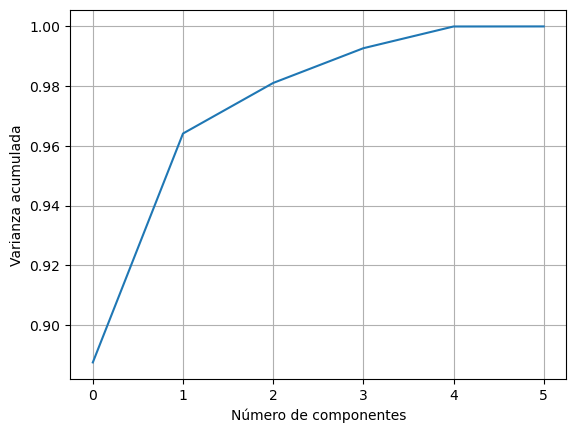

In [14]:
# Se grafica la varianza acumulada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

#### **Paso 6:** Se examina la proporción de relevancias –cargas–

La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).

Se revisan los valores absolutos de los componentes principales seleccionados. Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [15]:
print(pd.DataFrame(abs(pca.components_)))

          0         1         2         3         4         5
0  0.396902  0.386463  0.422059  0.406380  0.421629  0.414808
1  0.506388  0.611676  0.250450  0.449226  0.322301  0.031879
2  0.270322  0.066655  0.148777  0.244760  0.183309  0.898242
3  0.715284  0.663573  0.146997  0.035827  0.084510  0.134189
4  0.036541  0.178119  0.657208  0.703758  0.194082  0.045525
5  0.000415  0.000591  0.532425  0.276739  0.799962  0.000423


In [16]:
CargasComponentes = pd.DataFrame(pca.components_, columns=NuevaMatriz.columns)
CargasComponentes

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0.396902,0.386463,0.422059,0.406380,0.421629,0.414808
1,-0.506388,-0.611676,0.250450,0.449226,0.322301,0.031879
2,0.270322,0.066655,0.148777,0.244760,0.183309,-0.898242
3,-0.715284,0.663573,0.146997,-0.035827,0.084510,-0.134189
4,-0.036541,0.178119,-0.657208,0.703758,-0.194082,0.045525
5,-0.000415,0.000591,-0.532425,-0.276739,0.799962,-0.000423


In [17]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=NuevaMatriz.columns)
CargasComponentes

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0.396902,0.386463,0.422059,0.406380,0.421629,0.414808
1,0.506388,0.611676,0.250450,0.449226,0.322301,0.031879
2,0.270322,0.066655,0.148777,0.244760,0.183309,0.898242
3,0.715284,0.663573,0.146997,0.035827,0.084510,0.134189
4,0.036541,0.178119,0.657208,0.703758,0.194082,0.045525
5,0.000415,0.000591,0.532425,0.276739,0.799962,0.000423


Para la selección de variables, **se toma como referencia el 40%%**

In [18]:
DatosCancerACP = BCancer.drop(columns=['', '', '', '', ''])
DatosCancerACP

NameError: name 'BCancer' is not defined